In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
raw_data = pd.read_json('food_enforcement_US_bacteria.json', orient='records')

In [3]:
print(raw_data.shape)
print(raw_data.head(10).product_description)

(6104, 26)
0    Native Catch Salmon Bacon, Traditional flavor....
1    Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/...
2    Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) ...
3    Fresh Fruit Product is labeled in part:  "***F...
4    Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774...
5    River Ranch brand Diced Grn Cabbage w/Color, 4...
6    Sweet and Sour Stir Fry packaged under the fol...
7    Onion Slab Cut.  Products are labeled in part:...
8    MIX w/yellow onions used as an ingredient.  Pr...
9    Fresh n Easy brand Shred Grn Cabbage w/Color, ...
Name: product_description, dtype: object


### Bag of words, using CountVectorized, X

In [4]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 2))

corpus = raw_data['product_description']
X = vectorizer.fit_transform(corpus)
X.shape

(6104, 63220)

### Elbow Method for CountVectorized, X

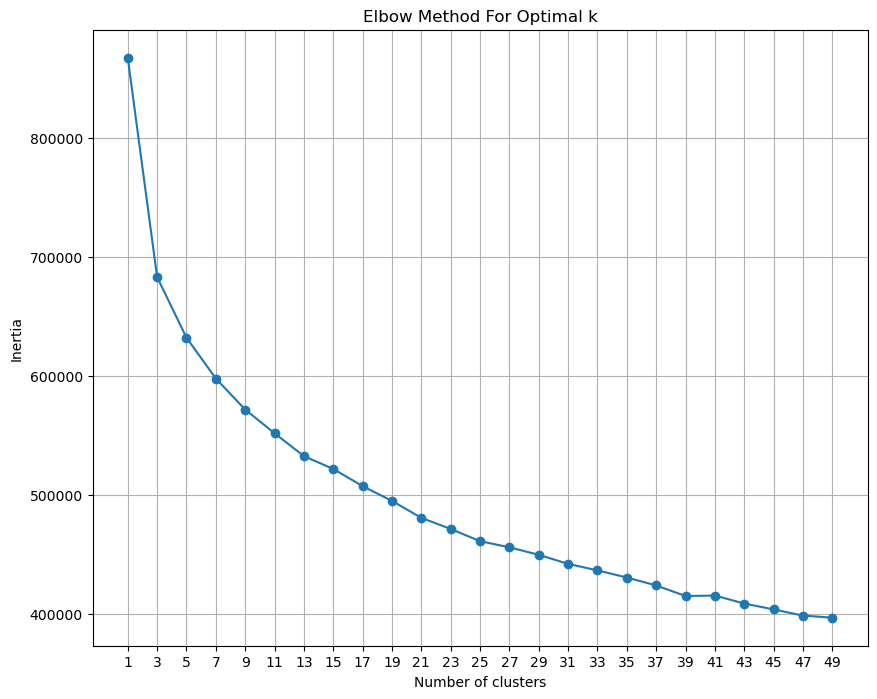

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 51, 2)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=30, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### Silhouette Plots for CountVectorized, X

For n_clusters = 3 The average silhouette_score is: 0.7613478432173022


/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


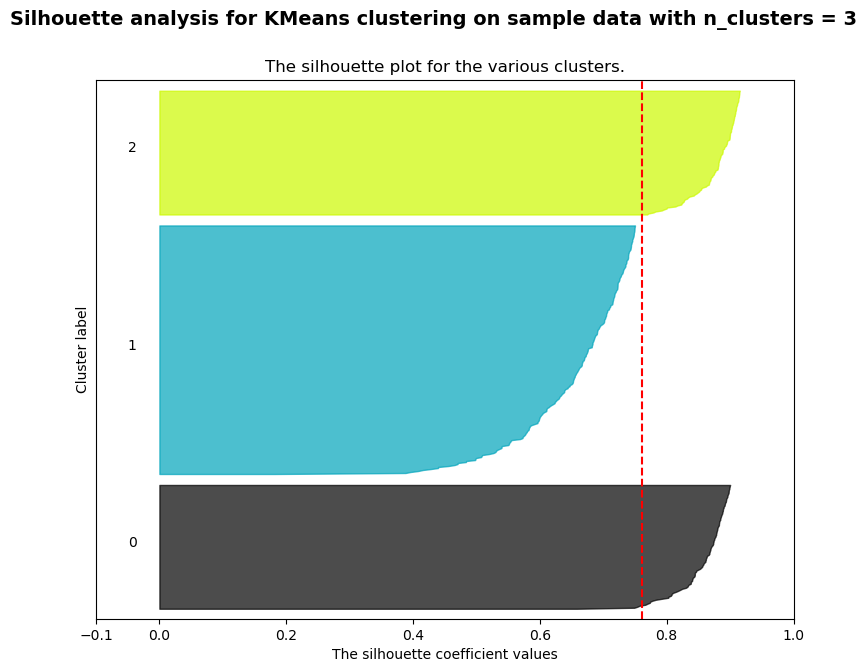

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is: 0.561279886106965


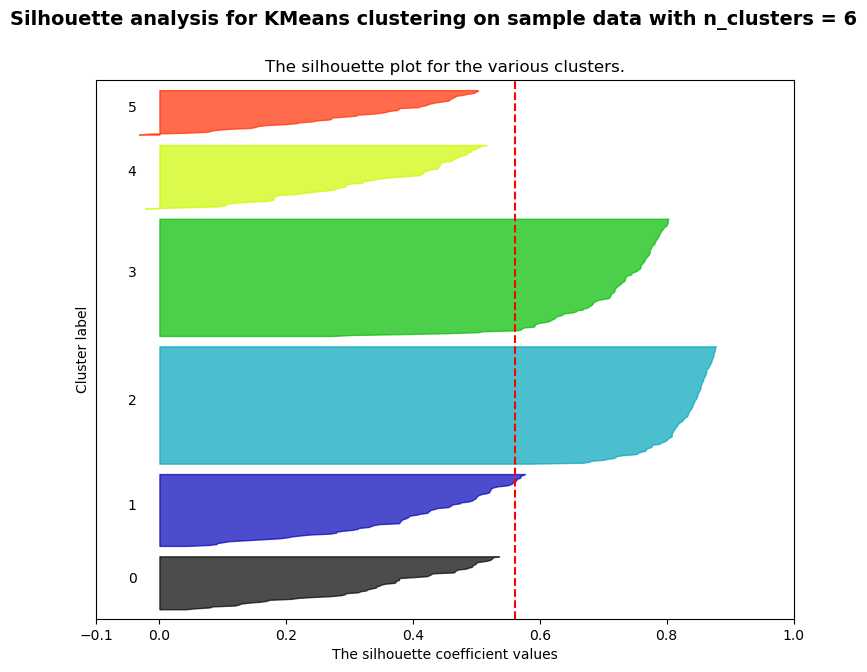

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 7 The average silhouette_score is: 0.44148278488232606


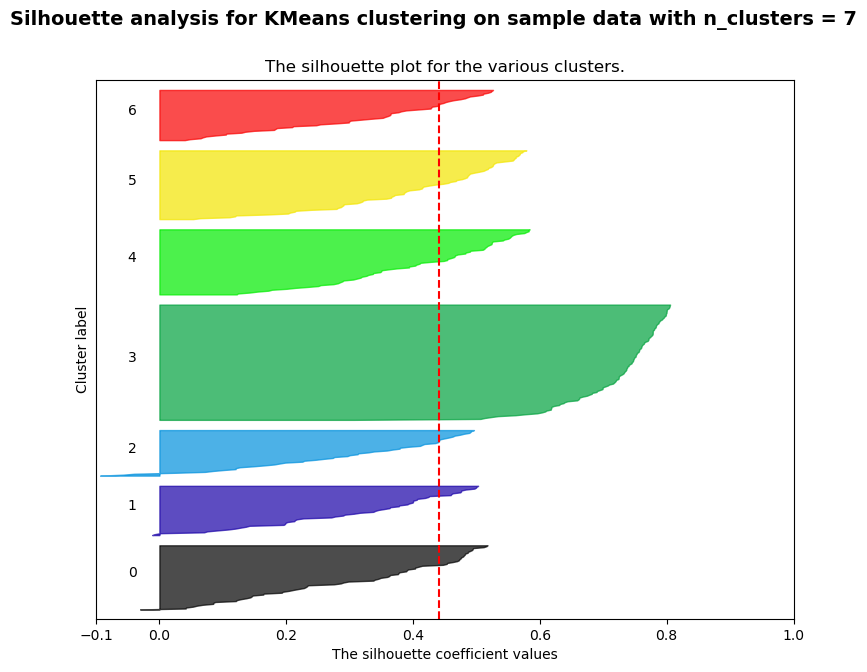

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 8 The average silhouette_score is: 0.33724125871890664


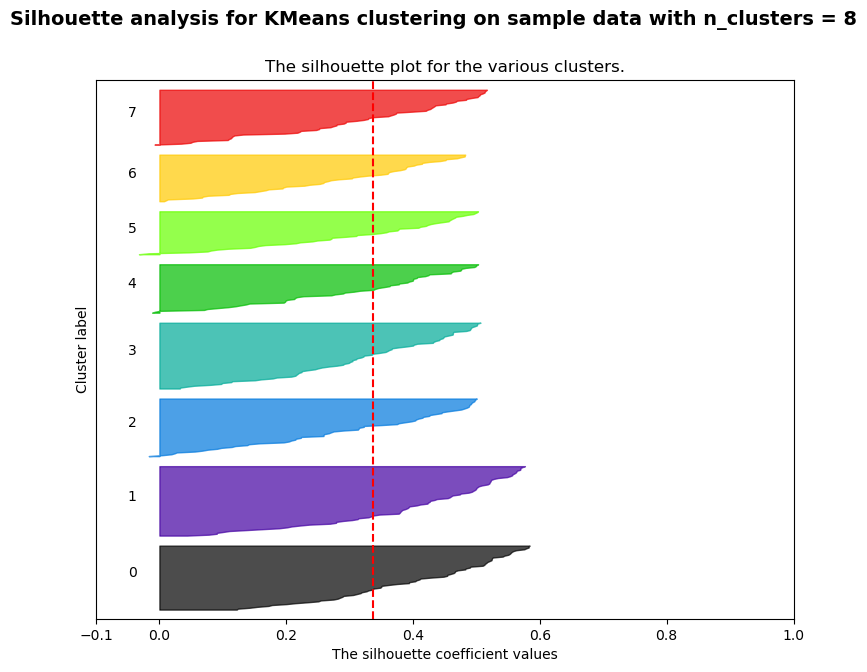

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 9 The average silhouette_score is: 0.3469552395555968


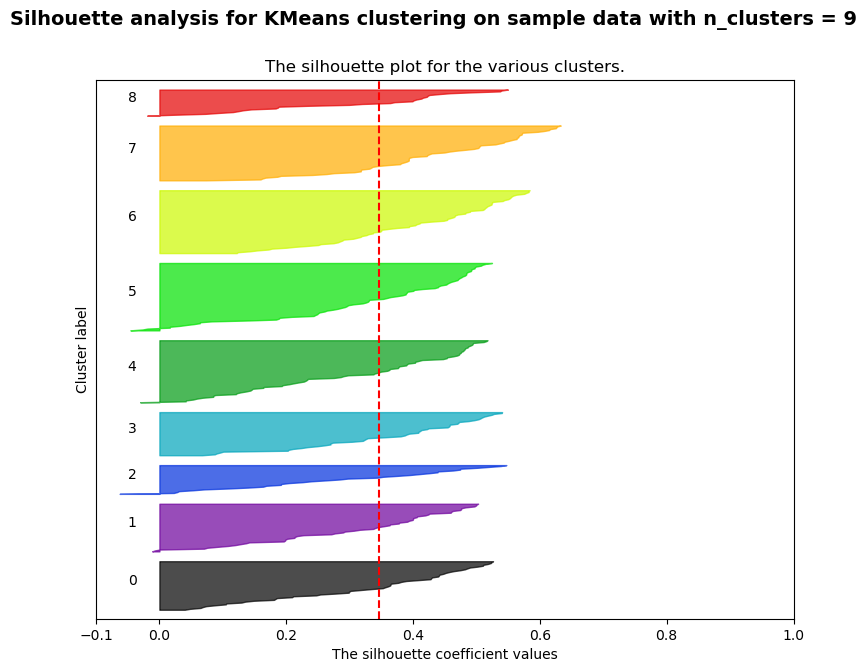

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 10 The average silhouette_score is: 0.34814017842332823


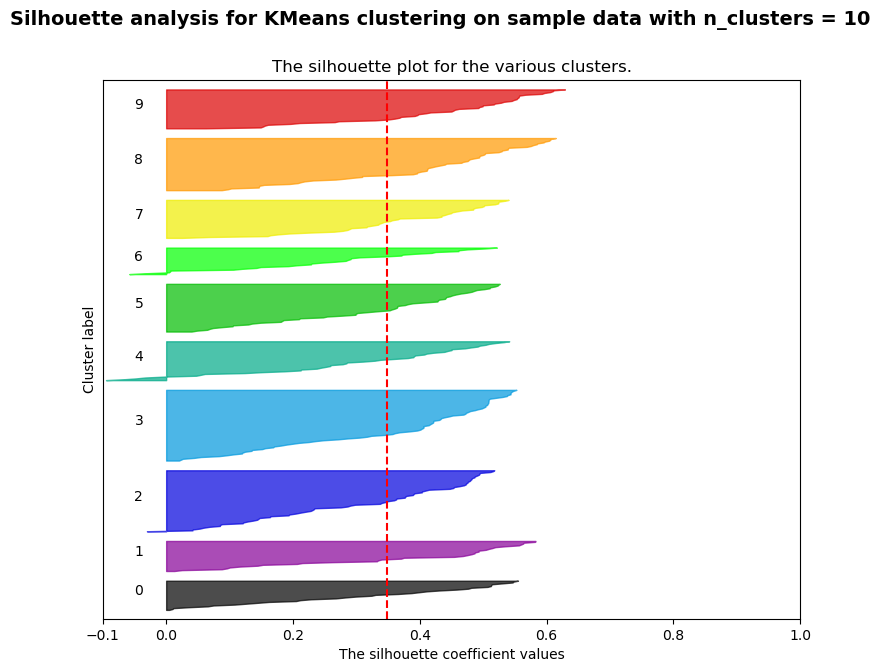

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 20 The average silhouette_score is: 0.3343612557654211


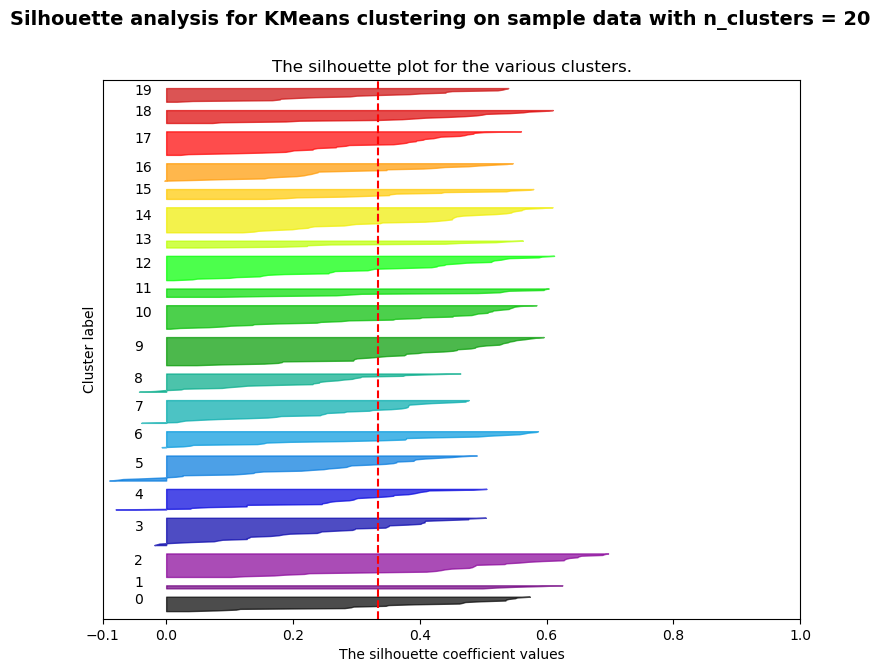

/Users/main/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 30 The average silhouette_score is: 0.33802340918260076


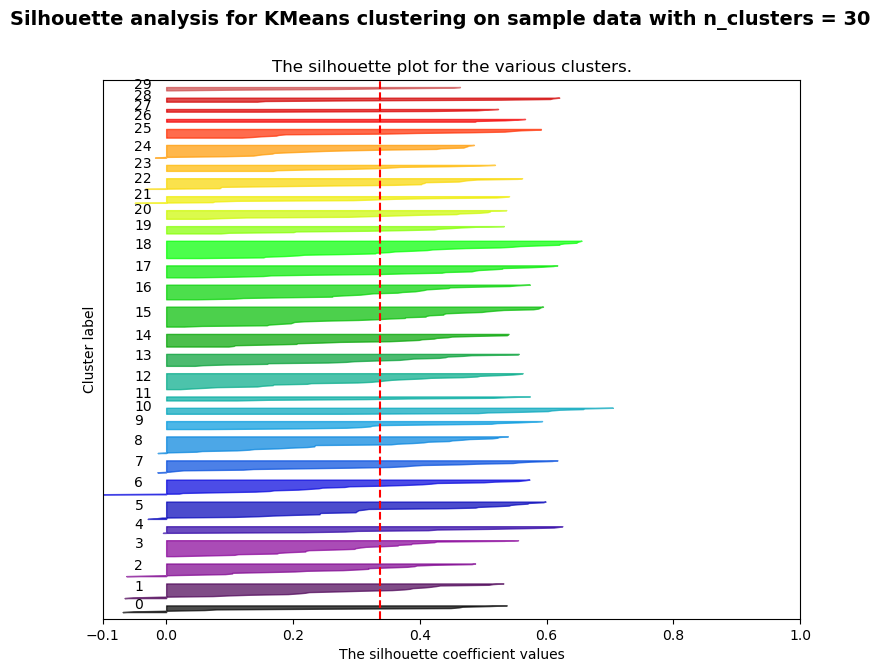

In [26]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
import random
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

range_n_clusters = [3, 6, 7, 8, 9, 10, 20, 30]

for n_clusters in range_n_clusters:
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(9, 7)

    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters, "The average silhouette_score is:", silhouette_avg)

    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = len(ith_cluster_silhouette_values)
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()


### Bag of words, using TfidfVectorizer

In [32]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_tfidf = vectorizer.fit_transform(raw_data['product_description'])

svd = TruncatedSVD(n_components=100)
X_reduced = svd.fit_transform(X_tfidf)

X_reduced.shape

(6104, 100)

### Elbow Method for TfidfVectorizer

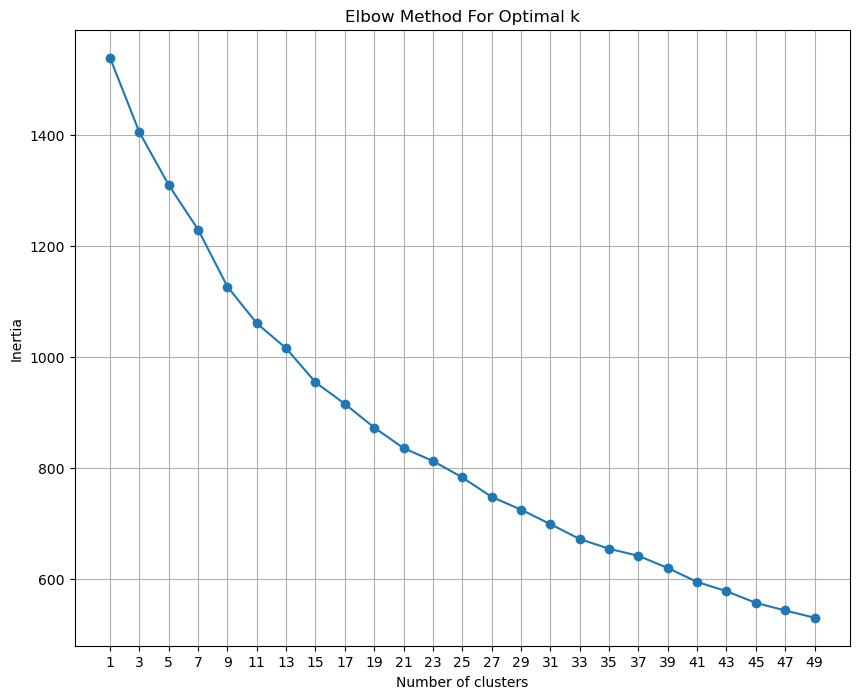

In [33]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []
k_values = range(1, 51, 2)

for k in k_values:
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=30, random_state=42)
    kmeans.fit(X_reduced)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(10, 8))
plt.plot(k_values, inertia, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)
plt.show()

### fit Kmeans

In [37]:
#fit Kmeans with k clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=23,n_init=30)
km.fit(X_reduced)

KMeans(n_clusters=23, n_init=30)

### labels are named with integers and stored in the `labels_` attribute

In [38]:
km.labels_

array([18, 20, 20, ..., 20, 20, 20], dtype=int32)

### take a look at one of the cluster results

In [48]:
# You should look at all the clusters, but let's look at cluster "15" (I chose this arbitrarily; you should look at all of them)

for i in range(0,len(km.labels_)):
    if km.labels_[i] == 20:
        print(raw_data['product_description'][i])
        print('**********')

Delish Fruit Burst 10 oz.(283 g)  Enjoy by: 8/28/12 Distributed by: Walgreen Co. 200 Wilmot Road, Deerfield, IL 60015 Distributed by Walgreens UPC 049022 55862 5
**********
Garden Pure Holiday Fruit Bowl 4 lbs (1.81kg) Best By: 8/28/12 and before   F& S Produce Co. Inc. Headquarters, Rosenhayn, NJ 08532      UPC 6 01172 00264 1
**********
Fresh Fruit Product is labeled in part:  "***Fresh Island Medley***1 LB (454g)***Best If Sold By***Ingredients:  Pineapple, Mango, Papaya.***Packed in its own juice***Distributed by:  Winn-Dixie Stores Inc. Jacksonville, FL 32254***For Nutrition Information Call 1-888-449-9386***P-009***0 21140 01696 6***PERISHABLE KEEP REFRIGERATED***"
**********
Ready Pac¿ Gourmet Fruit Bowl, 64oz , UPC 7774522620, Use by dates 9/9/2012 or earlier and 9/7/2012 & 9/8/2012.
**********
Onion Slab Cut.  Products are labeled in part:  "***Onions Yellow Slab***Ready To Eat Product***LB***"         "***FP CENTRAL FL. FRESHCUTS ONIONS, FC YELLOW SLAB***RT # FC***"    Item #